<a href="https://colab.research.google.com/github/a-nagar/python-workshop/blob/main/Python_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Let's start by looking at our dataset. Dataset contains 506 rows about neighborhoods in the Boston area. Each data point has two features - average number of rooms and average distance from major employment centers - and a target variable indicating the average value of homes in that neighborhood.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
boston = pd.read_csv('https://an-utd-python.s3.us-west-1.amazonaws.com/BostonHousePrices.csv')
boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [ ]:
boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


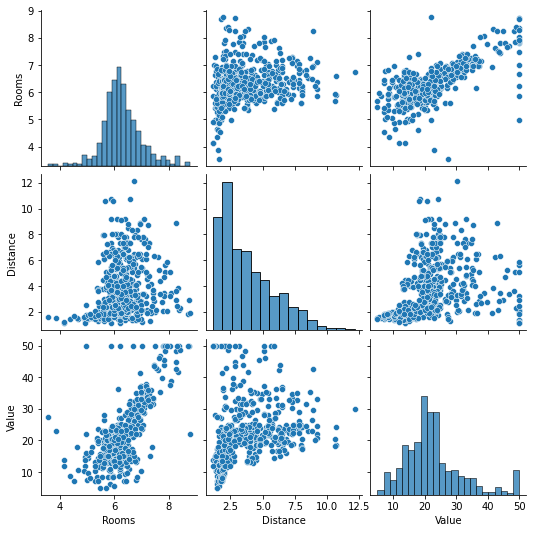

In [ ]:
sns.pairplot(boston)

In [ ]:
corr = boston.corr()

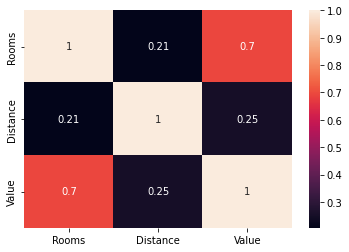

In [ ]:
sns.heatmap(corr, annot=True)

## Linear Regression using StatsModels library

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
y = boston['Value'] # dependent variable
X = boston[['Rooms', 'Distance']] # independent variable

In [ ]:
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X).fit() # fitting the model
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.84e-75
Time:                        16:43:00   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression Using Scikit-Learn

In [ ]:
from sklearn import linear_model

In [ ]:
y = boston['Value'] # dependent variable
X = boston[['Rooms', 'Distance']] # independent variable

In [ ]:
lm = linear_model.LinearRegression() 
lm.fit(X, y)

LinearRegression()

In [ ]:
# r2 score
lm.score(X, y)

0.4955246476058477

In [ ]:
# coefficient
lm.coef_

array([8.80141183, 0.48884854])

In [ ]:
# intercept
lm.intercept_

-34.636050175473315

## Logistic Regression

We will use the US-pumpkins dataset which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

In [ ]:
pumpkins = pd.read_csv('https://an-utd-python.s3.us-west-1.amazonaws.com/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

We are going to try to predict the color class using Logistic Regression method.

In [ ]:
pumpkins['Color'].value_counts()

ORANGE     916
WHITE      213
STRIPED     12
Name: Color, dtype: int64

Let's convert the categorical data into labels. Luckily, sklearn has a method for this called LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)


new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [ ]:
new_pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0


In [ ]:
new_pumpkins['Color'].value_counts()

0    835
1    156
Name: Color, dtype: int64

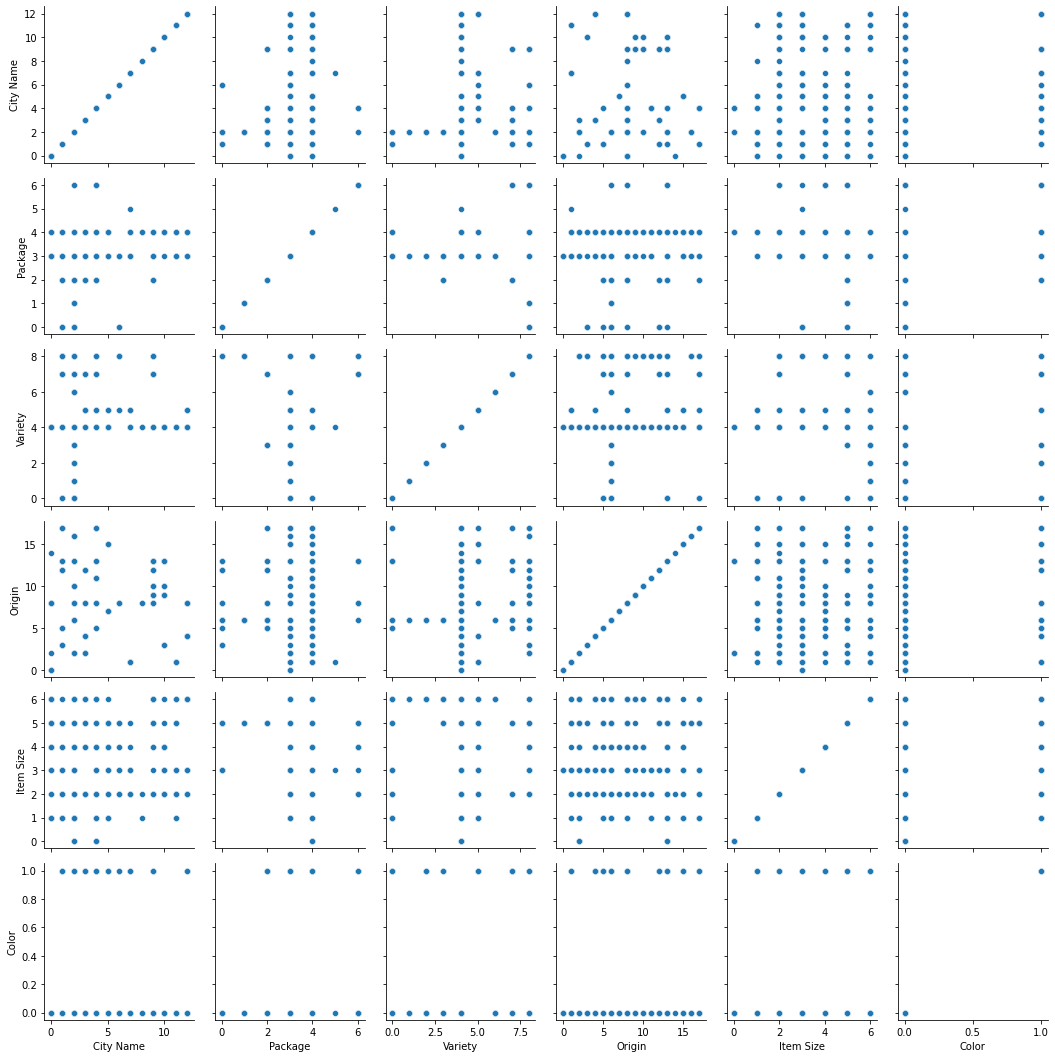

In [ ]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


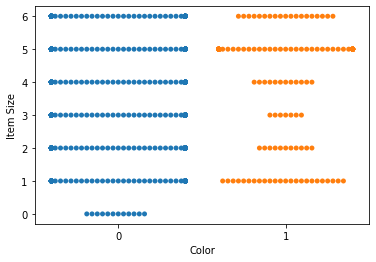

In [ ]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

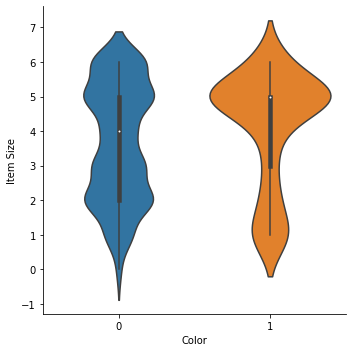

In [ ]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

In [ ]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]  # predictors, independent variables, attributes, features
y = new_pumpkins['Color'] # predicted variable, outcome variable, target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# no guarantee that train and test parts will keep same ratio of orange and white pumpkins
# if you want to ensure balanced class data in each part, stratified sampling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))



              precision    recall  f1-score   support

           0       0.85      0.98      0.91        85
           1       0.00      0.00      0.00        15

    accuracy                           0.83       100
   macro avg       0.42      0.49      0.45       100
weighted avg       0.72      0.83      0.77       100

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.83


In [ ]:
model.coef_

array([[ 0.05868392,  0.0958126 , -0.02975975, -0.03245229, -0.56699159]])

In [ ]:
model.intercept_

array([-0.47616433])

In [ ]:
model.predict_proba(X_test)[:5]

array([[0.9513989 , 0.0486011 ],
       [0.96309216, 0.03690784],
       [0.43906681, 0.56093319],
       [0.90984627, 0.09015373],
       [0.88617068, 0.11382932]])

In [ ]:
y_test.shape

(100,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[83,  2],
       [15,  0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


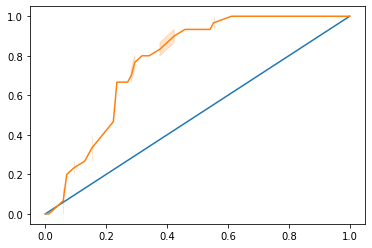

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

In [ ]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.7729411764705882


## Decision Tree Classification Model

[Text(0.39285714285714285, 0.9166666666666666, 'X[2] <= 4.5\ngini = 0.266\nsamples = 891\nvalue = [750, 141]'),
 Text(0.21428571428571427, 0.75, 'X[2] <= 3.5\ngini = 0.079\nsamples = 560\nvalue = [537, 23]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[3] <= 1.5\ngini = 0.441\nsamples = 70\nvalue = [47, 23]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[2] <= 1.5\ngini = 0.289\nsamples = 57\nvalue = [47, 10]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.2857142857142857, 0.25, 'X[1] <= 5.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.35714285714285715, 0.08333333333333333, 'gini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.0\nsamples = 490\nvalue = [490, 0]'),
 Text(0.5714285714285714, 

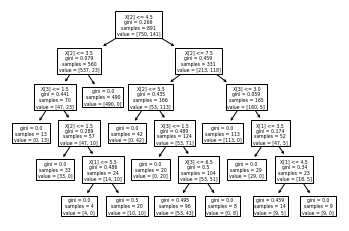

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)


In [ ]:
print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91        85
           1       0.00      0.00      0.00        15

    accuracy                           0.83       100
   macro avg       0.42      0.49      0.45       100
weighted avg       0.72      0.83      0.77       100

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.83


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X.columns

Index(['Origin', 'Item Size', 'Variety', 'City Name', 'Package'], dtype='object')

In [ ]:
y.unique()

array([0, 1])

In [ ]:
colors =  ["ORANGE", "WHITE"]

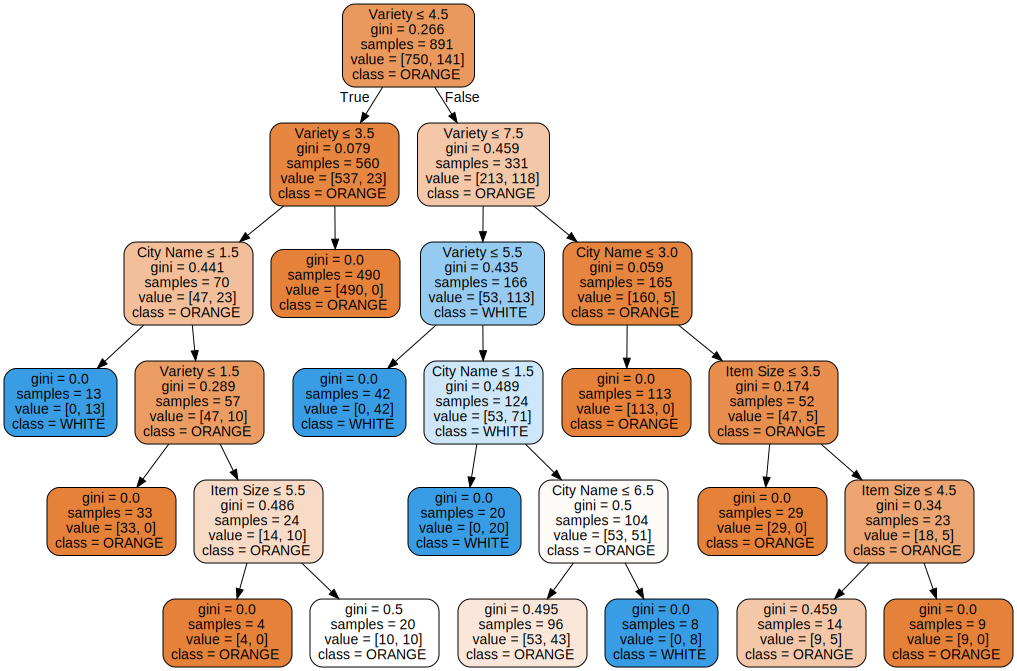

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=colors,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 